In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import pandas as pd

# Specify the path to the zip file on Google Drive
zip_file_path = '/content/drive/MyDrive/archive.zip'

# Specify the destination folder to extract the contents
extracted_folder_path = '/content/'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Read the dataset.csv file using pandas
csv_file_path = extracted_folder_path + 'dataset.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
# Count NaN values in each column
nan_count_per_column = df.isna().sum()

# Display the result
print("NaN count per column:")
print(nan_count_per_column)


NaN count per column:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [4]:
df.count()

id                   43400
gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  41938
smoking_status       30108
stroke               43400
dtype: int64

In [5]:
# Assuming 'stroke' is the column you want to group by
stroke_counts = df['stroke'].value_counts()

# Display the count of each value in the 'stroke' column
print("Stroke column value counts:")
print(stroke_counts)


Stroke column value counts:
0    42617
1      783
Name: stroke, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
encoded_df = df.copy()

# Iterate through columns and encode non-numeric columns
label_encoder = LabelEncoder()
for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':
        encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Display the updated DataFrame
encoded_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,3,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,3,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,3,0


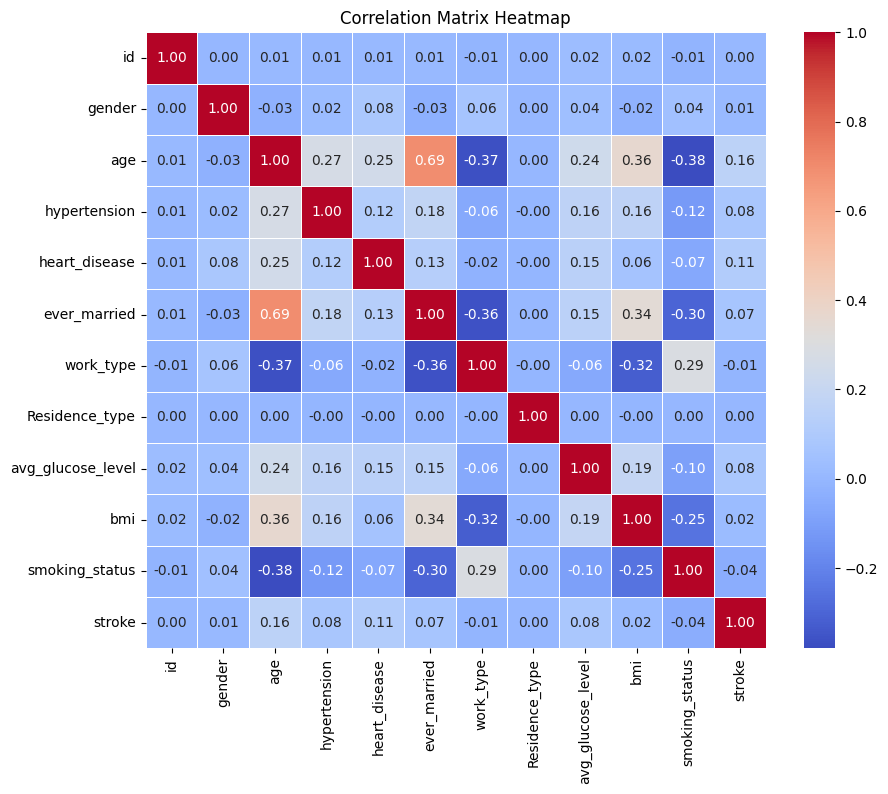

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


* fill na using knn imputer

In [12]:
import pandas as pd
from sklearn.impute import KNNImputer

# Use KNNImputer to fill NaN values
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
df_imputed = pd.DataFrame(imputer.fit_transform(encoded_df), columns=encoded_df.columns)

# Display the first few rows of the DataFrame after imputation
(df_imputed.head())


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,3.0,0.0
1,30468.0,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,1.0,0.0
2,16523.0,0.0,8.0,0.0,0.0,0.0,2.0,1.0,110.89,17.6,3.0,0.0
3,56543.0,0.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,0.0,0.0
4,46136.0,1.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,3.0,0.0


* drop nans

In [20]:
DF=df
# Drop rows with NaN values
df = df_imputed.dropna()

# Display the first few rows of the cleaned DataFrame
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,3.0,0.0
1,30468.0,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,1.0,0.0
2,16523.0,0.0,8.0,0.0,0.0,0.0,2.0,1.0,110.89,17.6,3.0,0.0
3,56543.0,0.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,0.0,0.0
4,46136.0,1.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196.0,0.0,10.0,0.0,0.0,0.0,4.0,1.0,58.64,20.4,1.0,0.0
43396,5450.0,0.0,56.0,0.0,0.0,1.0,0.0,1.0,213.61,55.4,0.0,0.0
43397,28375.0,0.0,82.0,1.0,0.0,1.0,2.0,1.0,91.94,28.9,0.0,0.0
43398,27973.0,1.0,40.0,0.0,0.0,1.0,2.0,1.0,99.16,33.2,1.0,0.0


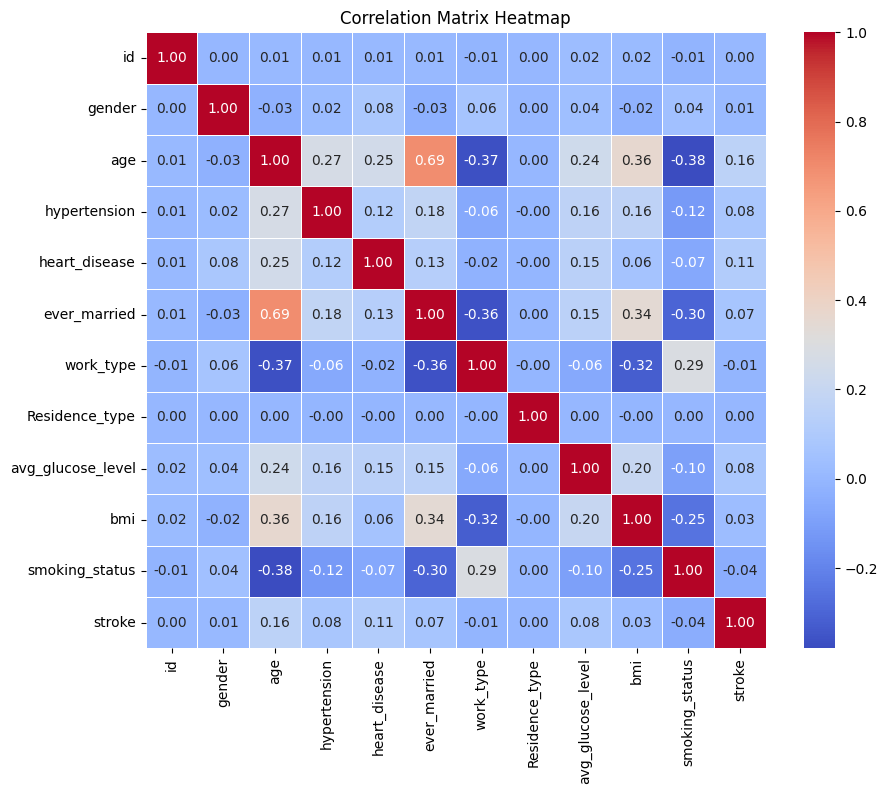

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


In [26]:
# Iterate through columns and print distinct values for non-numeric columns
for column in DF.columns:
    if df[column].dtype not in ['int64', 'float64']:
        unique_values = df[column].unique()
        print(f"Distinct values for column '{column}':")
        print(unique_values)
        print()


In [27]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original DataFrame
encoded_df = df.copy()

# Iterate through columns and encode non-numeric columns
label_encoder = LabelEncoder()
for column in encoded_df.columns:
    if encoded_df[column].dtype == 'object':
        encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Display the updated DataFrame
encoded_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669.0,1.0,3.0,0.0,0.0,0.0,4.0,0.0,95.12,18.0,3.0,0.0
1,30468.0,1.0,58.0,1.0,0.0,1.0,2.0,1.0,87.96,39.2,1.0,0.0
2,16523.0,0.0,8.0,0.0,0.0,0.0,2.0,1.0,110.89,17.6,3.0,0.0
3,56543.0,0.0,70.0,0.0,0.0,1.0,2.0,0.0,69.04,35.9,0.0,0.0
4,46136.0,1.0,14.0,0.0,0.0,0.0,1.0,0.0,161.28,19.1,3.0,0.0


In [28]:
encoded_df.dtypes

id                   float64
gender               float64
age                  float64
hypertension         float64
heart_disease        float64
ever_married         float64
work_type            float64
Residence_type       float64
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke               float64
dtype: object

In [29]:
# Assuming 'stroke' is the column you want to group by
stroke_counts = encoded_df['stroke'].value_counts()

# Display the count of each value in the 'stroke' column
print("Stroke column value counts:")
print(stroke_counts)


Stroke column value counts:
0.0    42617
1.0      783
Name: stroke, dtype: int64


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'X' contains the features and 'y' contains the target variable 'stroke'
X = encoded_df.drop('stroke', axis=1)  # Features
y = encoded_df['stroke']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler to balance the training set
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Display the counts before and after applying SMOTE
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())
print("\nAfter Undersampling:")
print(pd.Series(y_undersampled).value_counts())

Before SMOTE:
0.0    34098
1.0      622
Name: stroke, dtype: int64

After SMOTE:
0.0    34098
1.0    34098
Name: stroke, dtype: int64

After Undersampling:
0.0    622
1.0    622
Name: stroke, dtype: int64


# logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model on the resampled training set
model.fit(X_undersampled, y_undersampled)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.6813

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.68      0.81      8519
         1.0       0.04      0.77      0.08       161

    accuracy                           0.68      8680
   macro avg       0.52      0.72      0.44      8680
weighted avg       0.98      0.68      0.79      8680



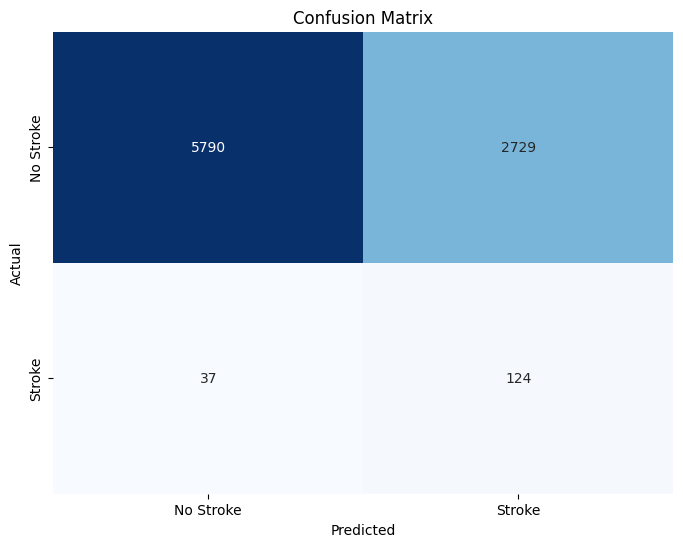

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model on the resampled training set
model.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.6903

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.69      0.81      8519
         1.0       0.04      0.71      0.08       161

    accuracy                           0.69      8680
   macro avg       0.52      0.70      0.45      8680
weighted avg       0.97      0.69      0.80      8680



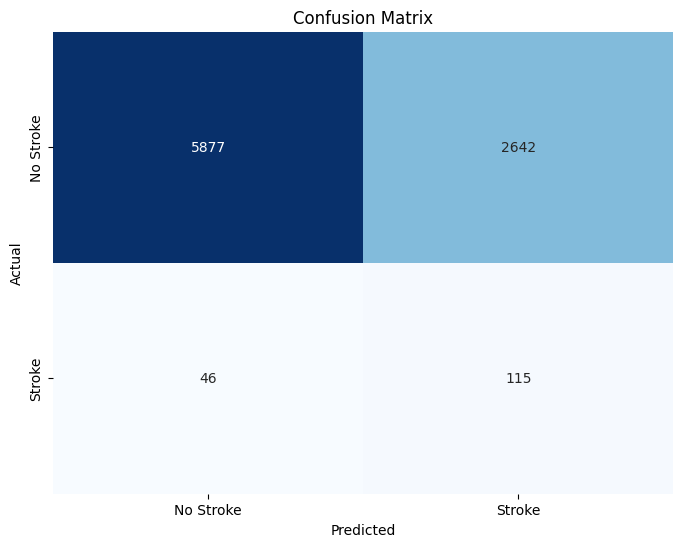

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Fit the model on the resampled training set
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9815

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


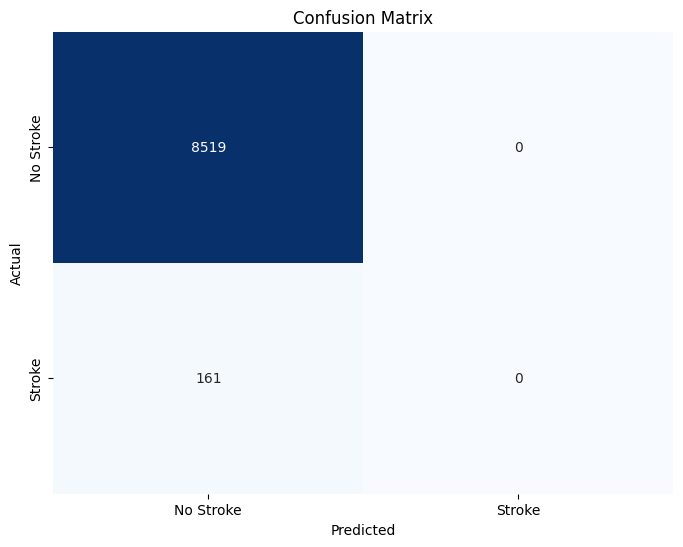

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# svm

SVM Model:
Accuracy: 0.3108

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.30      0.46      8519
         1.0       0.02      0.68      0.04       161

    accuracy                           0.31      8680
   macro avg       0.50      0.49      0.25      8680
weighted avg       0.96      0.31      0.46      8680



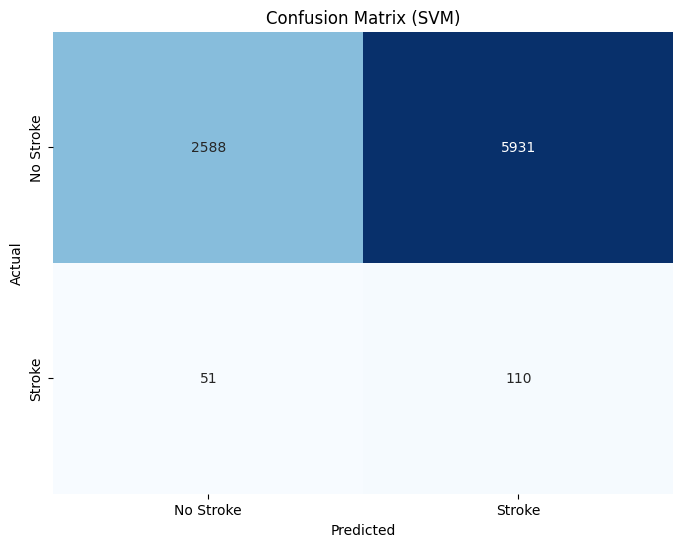

In [38]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the model on the resampled training set
svm_model.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display the results for SVM
print("SVM Model:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Model:
Accuracy: 0.3260

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.32      0.48      8519
         1.0       0.02      0.65      0.03       161

    accuracy                           0.33      8680
   macro avg       0.50      0.48      0.26      8680
weighted avg       0.96      0.33      0.47      8680



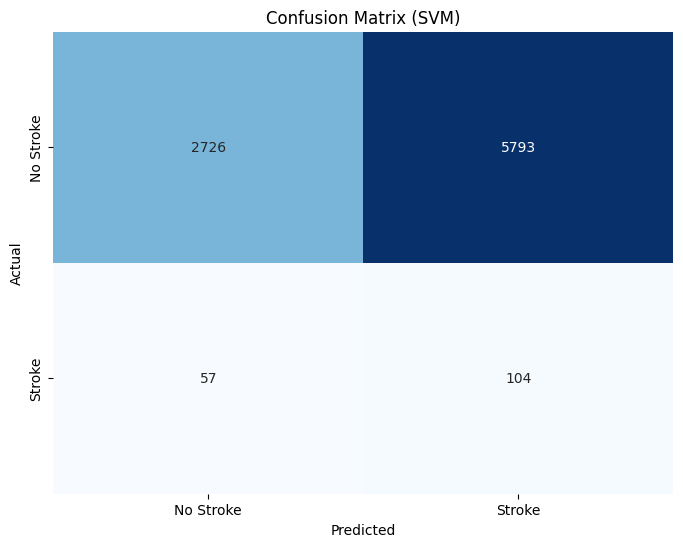

In [39]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the model on the resampled training set
svm_model.fit(X_undersampled, y_undersampled)

# Predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display the results for SVM
print("SVM Model:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Model:
Accuracy: 0.9815

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


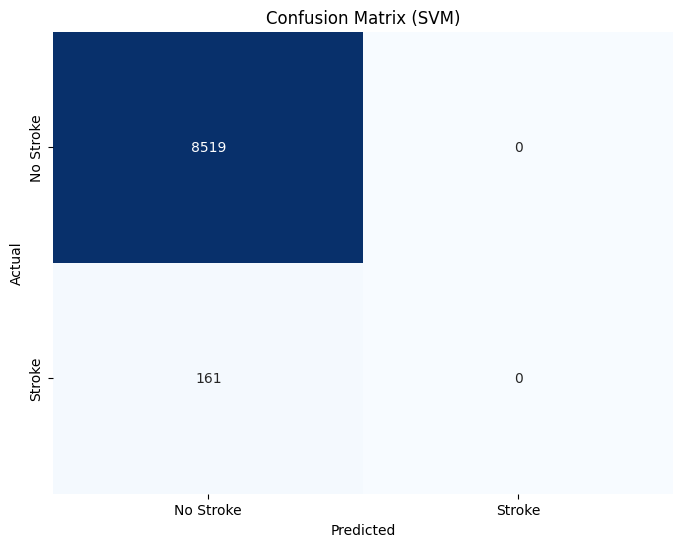

In [44]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the model on the resampled training set
svm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display the results for SVM
print("SVM Model:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# random forrest

Random Forest Model:
Accuracy: 0.9812

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.25      0.01      0.01       161

    accuracy                           0.98      8680
   macro avg       0.62      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



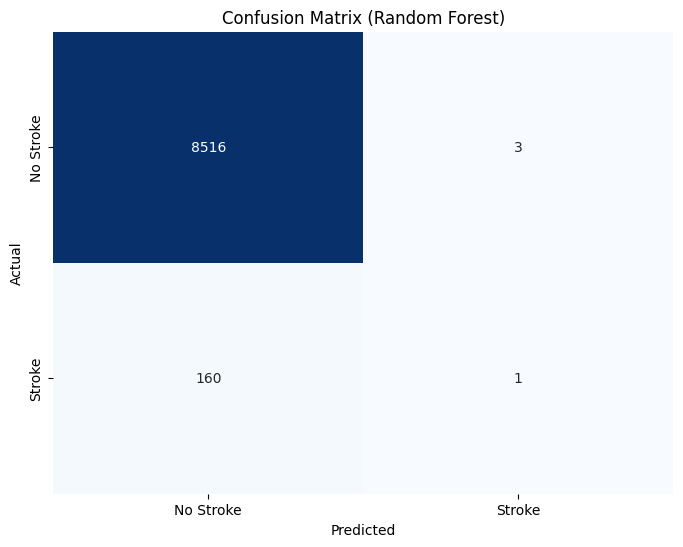

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training set
rf_model.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display the results for Random Forest
print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_rep_rf)

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Model:
Accuracy: 0.7290

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.73      0.84      8519
         1.0       0.05      0.78      0.10       161

    accuracy                           0.73      8680
   macro avg       0.52      0.75      0.47      8680
weighted avg       0.98      0.73      0.83      8680



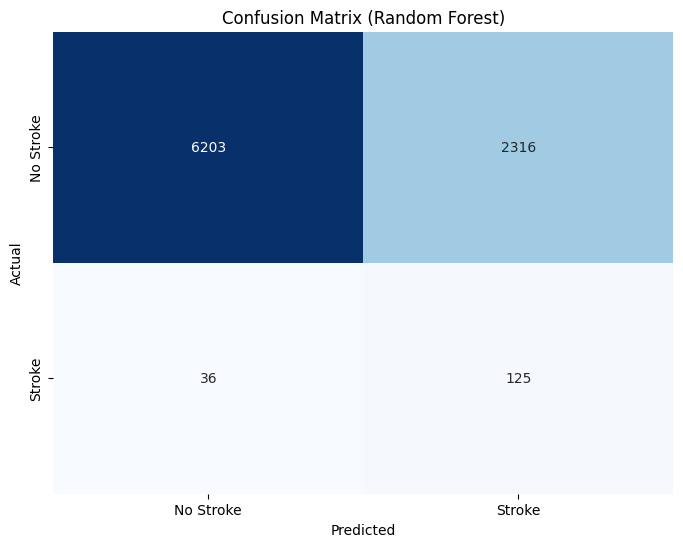

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training set
rf_model.fit(X_undersampled, y_undersampled)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display the results for Random Forest
print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_rep_rf)

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Model:
Accuracy: 0.9815

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


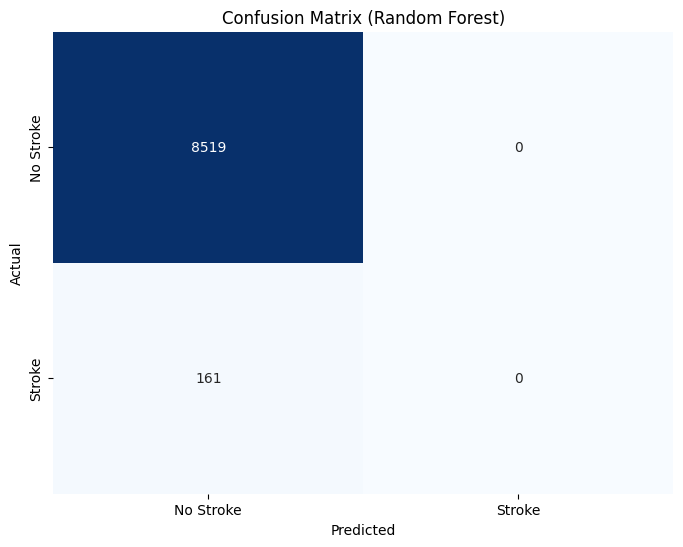

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training set
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display the results for Random Forest
print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:\n", classification_rep_rf)

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ANN

Epoch 1/500
1085/1085 [==============================] - 9s 8ms/step - loss: 1.3355 - accuracy: 0.4625 - precision_6: 0.0191 - recall_6: 0.5756 - val_loss: 1.3050 - val_accuracy: 0.5095 - val_precision_6: 0.5081 - val_recall_6: 0.5994 - lr: 1.0000e-05
Epoch 2/500
1085/1085 [==============================] - 8s 7ms/step - loss: 1.2670 - accuracy: 0.4763 - precision_6: 0.0190 - recall_6: 0.5563 - val_loss: 1.2390 - val_accuracy: 0.5088 - val_precision_6: 0.5083 - val_recall_6: 0.5331 - lr: 1.0000e-05
Epoch 3/500
1085/1085 [==============================] - 19s 17ms/step - loss: 1.2072 - accuracy: 0.4844 - precision_6: 0.0195 - recall_6: 0.5643 - val_loss: 1.1839 - val_accuracy: 0.5180 - val_precision_6: 0.5172 - val_recall_6: 0.5394 - lr: 1.0000e-05
Epoch 4/500
1085/1085 [==============================] - 9s 8ms/step - loss: 1.1616 - accuracy: 0.4919 - precision_6: 0.0195 - recall_6: 0.5563 - val_loss: 1.1427 - val_accuracy: 0.5165 - val_precision_6: 0.5147 - val_recall_6: 0.5766 - lr: 1

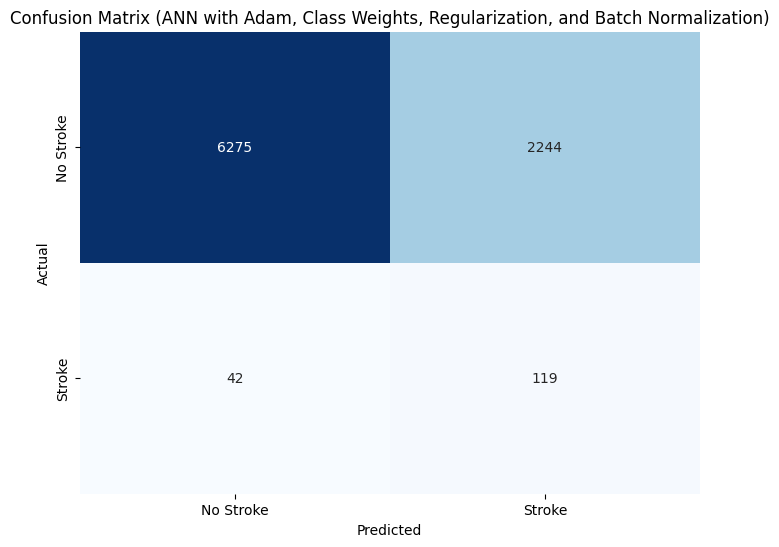

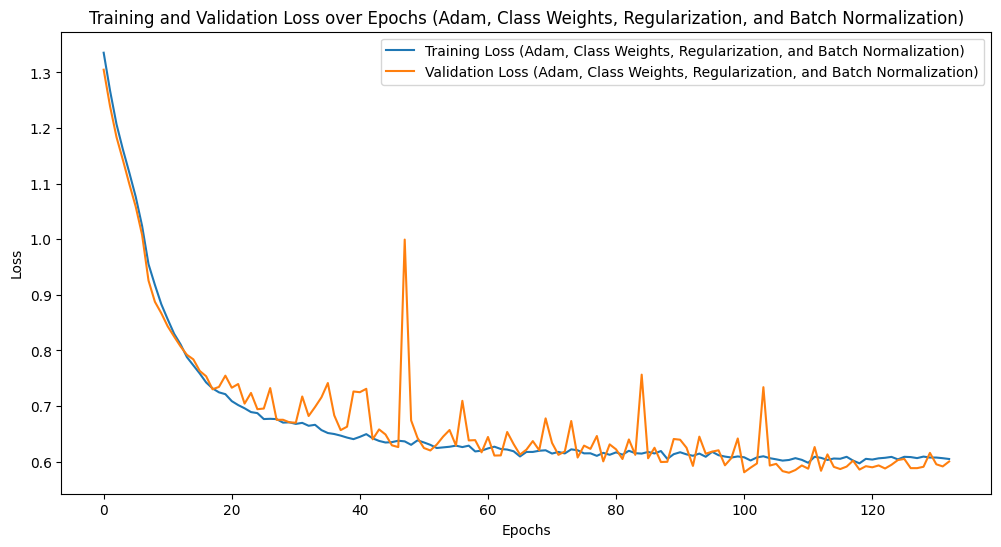

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import RMSprop  # Import RMSprop optimizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Create a Sequential model
ann_model_with_bn = Sequential()

# Input layer and the first hidden layer with Batch Normalization and regularization
ann_model_with_bn.add(Dense(units=64, activation='relu', input_dim=X_resampled.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.01)))
ann_model_with_bn.add(BatchNormalization())

# Second hidden layer with Batch Normalization and regularization
ann_model_with_bn.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
ann_model_with_bn.add(BatchNormalization())

# Output layer
ann_model_with_bn.add(Dense(units=1, activation='sigmoid'))

# Calculate class weights
total_samples = len(y_train)
weight_for_class_0 = total_samples / (2 * (total_samples - sum(y_train)))
weight_for_class_1 = total_samples / (2 * sum(y_train))
class_weights_imbalanced = {0: weight_for_class_0, 1: weight_for_class_1}



# Compile the model using RMSprop optimizer and class weights
custom_lr = 1e-5
rmsprop_optimizer_imbalanced = RMSprop(learning_rate=custom_lr)

# Assign higher weight to the rare class in the binary cross-entropy loss
ann_model_with_bn.compile(optimizer=rmsprop_optimizer_imbalanced,
                          loss=tf.keras.losses.BinaryCrossentropy(from_logits=False,
                                                                  label_smoothing=0,
                                                                  reduction=tf.keras.losses.Reduction.AUTO,
                                                                  name='binary_crossentropy'),
                          metrics=['accuracy', Precision(), Recall()])

# Define Early Stopping callback with validation recall as the monitored metric
early_stopping_with_bn = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch % 50 == 0 and epoch != 0:
        return lr * 0.5
    else:
        return lr

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with learning rate schedule
history_with_bn = ann_model_with_bn.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1,
                                         validation_data=(X_resampled, y_resampled),
                                         class_weight=class_weights_imbalanced,
                                         callbacks=[early_stopping_with_bn, lr_scheduler])

# Evaluate the ANN model with Adam, class weights, regularization, and Batch Normalization on the test set
y_pred_ann_with_bn = ann_model_with_bn.predict(X_test)
y_pred_ann_with_bn = (y_pred_ann_with_bn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model on the test set
accuracy_ann_with_bn = accuracy_score(y_test, y_pred_ann_with_bn)
classification_rep_ann_with_bn = classification_report(y_test, y_pred_ann_with_bn)

# Display the results for ANN with Adam, class weights, regularization, and Batch Normalization
print("Artificial Neural Network (ANN) Model with Adam, Class Weights, Regularization, and Batch Normalization:")
print(f"Accuracy: {accuracy_ann_with_bn:.4f}")
print("\nClassification Report:\n", classification_rep_ann_with_bn)

# Confusion matrix for ANN with Adam, class weights, regularization, and Batch Normalization
conf_matrix_ann_with_bn = confusion_matrix(y_test, y_pred_ann_with_bn)

# Display the confusion matrix for ANN with Adam, class weights, regularization, and Batch Normalization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann_with_bn, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (ANN with Adam, Class Weights, Regularization, and Batch Normalization)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot loss and validation loss over epochs for Adam, class weights, regularization, and Batch Normalization
plt.figure(figsize=(12, 6))
plt.plot(history_with_bn.history['loss'], label='Training Loss (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.plot(history_with_bn.history['val_loss'], label='Validation Loss (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.title('Training and Validation Loss over Epochs (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Create a Sequential model
ann_model_with_bn = Sequential()

# Input layer and the first hidden layer with Batch Normalization and regularization
ann_model_with_bn.add(Dense(units=64, activation='relu', input_dim=X_resampled.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.01)))
ann_model_with_bn.add(BatchNormalization())

# Second hidden layer with Batch Normalization and regularization
ann_model_with_bn.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
ann_model_with_bn.add(BatchNormalization())

# Output layer
ann_model_with_bn.add(Dense(units=1, activation='sigmoid'))

# Calculate class weights
total_samples = len(y_train)
weight_for_class_0 = total_samples / (2 * (total_samples - sum(y_train)))
weight_for_class_1 = total_samples / (2 * sum(y_train))
class_weights_imbalanced = {0: weight_for_class_0, 1: weight_for_class_1}



# Compile the model using RMSprop optimizer and class weights
custom_lr = 1e-5

rmsprop_optimizer_imbalanced = Adam(learning_rate=custom_lr)
# Assign higher weight to the rare class in the binary cross-entropy loss
ann_model_with_bn.compile(optimizer=rmsprop_optimizer_imbalanced,
                          loss=tf.keras.losses.BinaryCrossentropy(from_logits=False,
                                                                  label_smoothing=0,
                                                                  reduction=tf.keras.losses.Reduction.AUTO,
                                                                  name='binary_crossentropy'),
                          metrics=['accuracy', Precision(), Recall()])

# Define Early Stopping callback with validation recall as the monitored metric
early_stopping_with_bn = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch % 50 == 0 and epoch != 0:
        return lr * 0.5
    else:
        return lr

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with learning rate schedule
history_with_bn = ann_model_with_bn.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1,
                                         validation_data=(X_resampled, y_resampled),
                                         class_weight=class_weights_imbalanced,
                                         callbacks=[early_stopping_with_bn, lr_scheduler])

# Evaluate the ANN model with Adam, class weights, regularization, and Batch Normalization on the test set
y_pred_ann_with_bn = ann_model_with_bn.predict(X_test)
y_pred_ann_with_bn = (y_pred_ann_with_bn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model on the test set
accuracy_ann_with_bn = accuracy_score(y_test, y_pred_ann_with_bn)
classification_rep_ann_with_bn = classification_report(y_test, y_pred_ann_with_bn)

# Display the results for ANN with Adam, class weights, regularization, and Batch Normalization
print("Artificial Neural Network (ANN) Model with Adam, Class Weights, Regularization, and Batch Normalization:")
print(f"Accuracy: {accuracy_ann_with_bn:.4f}")
print("\nClassification Report:\n", classification_rep_ann_with_bn)

# Confusion matrix for ANN with Adam, class weights, regularization, and Batch Normalization
conf_matrix_ann_with_bn = confusion_matrix(y_test, y_pred_ann_with_bn)

# Display the confusion matrix for ANN with Adam, class weights, regularization, and Batch Normalization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann_with_bn, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (ANN with Adam, Class Weights, Regularization, and Batch Normalization)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot loss and validation loss over epochs for Adam, class weights, regularization, and Batch Normalization
plt.figure(figsize=(12, 6))
plt.plot(history_with_bn.history['loss'], label='Training Loss (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.plot(history_with_bn.history['val_loss'], label='Validation Loss (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.title('Training and Validation Loss over Epochs (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/500
1085/1085 [==============================] - 16s 11ms/step - loss: 1.2367 - accuracy: 0.6238 - precision_7: 0.0322 - recall_7: 0.6881 - val_loss: 1.1472 - val_accuracy: 0.7637 - val_precision_7: 0.7256 - val_recall_7: 0.8483 - lr: 1.0000e-05
Epoch 2/500
1085/1085 [==============================] - 8s 7ms/step - loss: 1.1117 - accuracy: 0.6034 - precision_7: 0.0384 - recall_7: 0.8794 - val_loss: 1.0774 - val_accuracy: 0.7728 - val_precision_7: 0.7268 - val_recall_7: 0.8742 - lr: 1.0000e-05
Epoch 3/500
1085/1085 [==============================] - 8s 7ms/step - loss: 1.0533 - accuracy: 0.5925 - precision_7: 0.0382 - recall_7: 0.8987 - val_loss: 1.0494 - val_accuracy: 0.7443 - val_precision_7: 0.6692 - val_recall_7: 0.9663 - lr: 1.0000e-05
Epoch 4/500
1085/1085 [==============================] - 8s 7ms/step - loss: 1.0106 - accuracy: 0.6000 - precision_7: 0.0384 - recall_7: 0.8875 - val_loss: 1.0336 - val_accuracy: 0.7460 - val_precision_7: 0.6712 - val_recall_7: 0.9645 - lr: 1

Artificial Neural Network (ANN) Model with Adam, Class Weights, Regularization, and Batch Normalization:
Accuracy: 0.7088

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.71      0.83      8519
         1.0       0.05      0.84      0.10       161

    accuracy                           0.71      8680
   macro avg       0.52      0.78      0.46      8680
weighted avg       0.98      0.71      0.81      8680



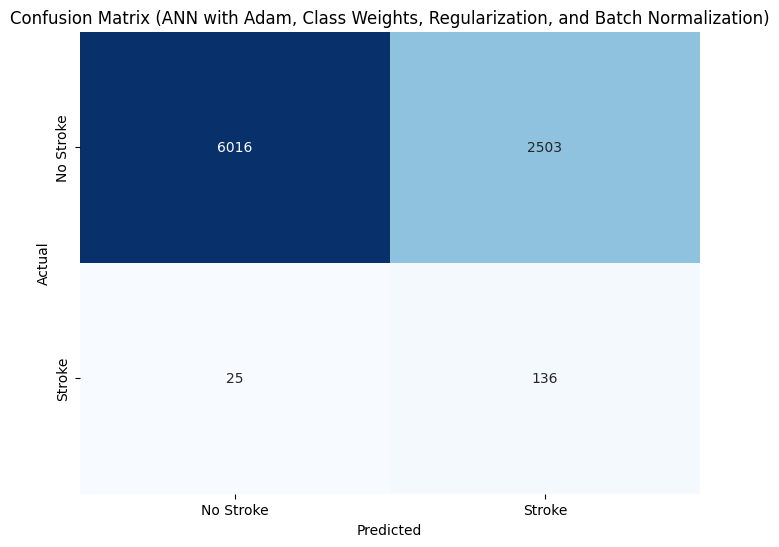

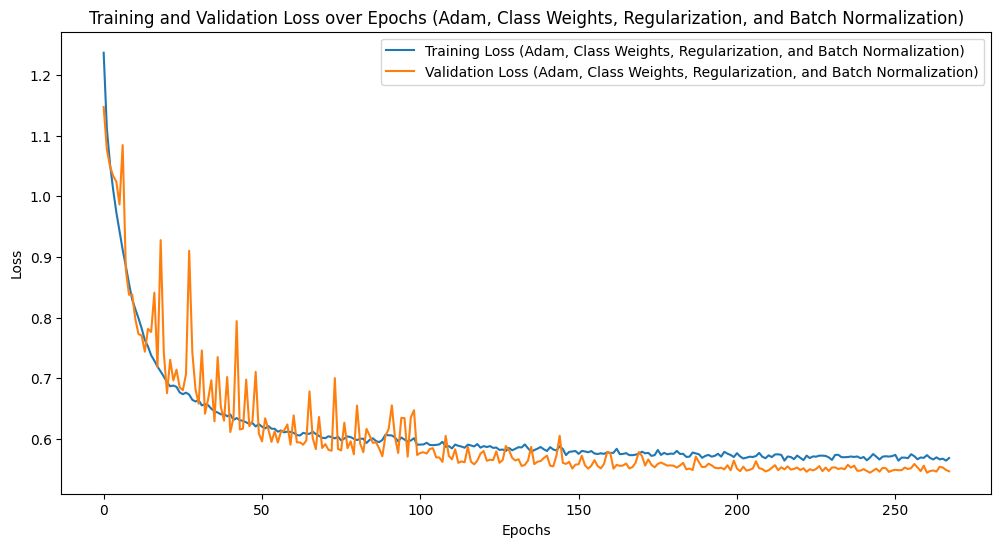

In [65]:
accuracy_ann_with_bn = accuracy_score(y_test, y_pred_ann_with_bn)
classification_rep_ann_with_bn = classification_report(y_test, y_pred_ann_with_bn)

# Display the results for ANN with Adam, class weights, regularization, and Batch Normalization
print("Artificial Neural Network (ANN) Model with Adam, Class Weights, Regularization, and Batch Normalization:")
print(f"Accuracy: {accuracy_ann_with_bn:.4f}")
print("\nClassification Report:\n", classification_rep_ann_with_bn)

# Confusion matrix for ANN with Adam, class weights, regularization, and Batch Normalization
conf_matrix_ann_with_bn = confusion_matrix(y_test, y_pred_ann_with_bn)

# Display the confusion matrix for ANN with Adam, class weights, regularization, and Batch Normalization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann_with_bn, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix (ANN with Adam, Class Weights, Regularization, and Batch Normalization)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot loss and validation loss over epochs for Adam, class weights, regularization, and Batch Normalization
plt.figure(figsize=(12, 6))
plt.plot(history_with_bn.history['loss'], label='Training Loss (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.plot(history_with_bn.history['val_loss'], label='Validation Loss (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.title('Training and Validation Loss over Epochs (Adam, Class Weights, Regularization, and Batch Normalization)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()